# **Decision Tree Analysis**
by **Desiree McElroy**
- Using the medical data set.

# Part I: Research Question

## A1.  Research Question

Similarly to the project from Task 1 using Naive Bayes, I would like to explore once again whether  there could be any contributing factors in someone being diagnosed with diabetes? Could these features be solid predictors in identifying who is more at risk for diabetes? 

## A2.  Goal of the Data Analysis

As highlighted in my previous analysis using Naive Bayes, diabetes is a prevalent disease affecting millions of Americans and continues to pose a significant public health challenge. In my last project, it was revealed the only Naive Bayes method capable of yielding *some* relevant metric was the Multinomial method. 

It is known that characteristics such as a person's demographics, location, and lifestyle choices are often linked to diabetes risk. I want to challenge this data set again, employing decision tree methods to help identify the most important predictors of diabetes and discover whether this algorithm is better suited for this data set than Multinomial Naive Bayes.

By applying the Decision Tree algorithm to this data set, I aim to uncover the underlying insights and relationships that contribute to the development of diabetes.  Decision Trees are adept at capturing complex and non-linear data. I hope to uncover findings on the factors influencing diabetes and uncover patterns in the data not originally noticed.

# Part II: Method Justification

## B1.  Decision Tree Justification

Decision trees work by splitting data into smaller sets according to the features. The first step is splitting the data. At each node in the tree, the tree algorithm evaluates all of the feature columns and makes a decision on the best way to split them. For example, for a continuous feature such as age, it may place a threshold on age 40 or higher (i.e. >=40). For categorical features, the tree will evaluate splits based on categories. It can create a branch for each category or create binary splits (e.g. area = urban vs. other). This process continues until a prediction is reached.

Decision trees essentially ranks features by importance, prioritizing the most important features at the top of the tree. The algorithm evaluates all features and chooses the feature that best splits the data at each step based on certain criteria.

The features that contribute the most to *reducing uncertainty* (e.g. separating diabetes Yes/No populations) are used at the higher levels of the tree. The lesser important features are used in the lower levels or may not be used at all.





<!-- ![Example of Decision Tree](decisiontree.png "Title") -->
<h3 align="center">Basic DecisionTree Example</h3> 

<img src="decisiontree.png" width="700" height="500" align="center"/>



**A breakdown of the above example:** \
*First Split (Age):* \
The tree starts by splitting the data based on the numerical feature age, setting the threshold at 30 years. This then creates two branches:
Yes: Age is older than 30.
No: Age 30 or younger.


*Second Split (Overweight):* \
On the "Yes" branch (patients over 30), the next split is based on the binary feature overweight (Yes or No).
Yes: The patient is overweight.
No: The patient is not overweight.



*Third Split (Vitamin D Levels):* \
On the "Overweight Yes" branch, the tree further splits based on the numerical feature vitamin D levels at a threshold of 10 units:
Below 10: Vitamin D levels are lower than 10.
Above 10: Vitamin D levels are 10 or higher.


**In Summary:** \
The decision tree first asks if the person is older than 30 years of age.
If this is true, it next checks if the person is overweight.
If the person is overweight, the tree further evaluates whether their vitamin D levels are below or above 10 units.
This structure allows the decision tree to narrow down and classify based on the combination of features, making decisions at each node until it reaches the final prediction (leaf node). Each split refines the group further and the tree continues to split based on the features that provide the best separation between classes.

**Expectations** \
It is known that Decision Tree algorithms are prone to overfitting. This algorithm comes with several hyperparameters, such as tree depth, number of estimators, and minimum samples for leaf nodes, each of which can have a large range of possible values. I expect to use hyperparameter tuning tools like grid search to find the optimal settings and prevent overfitting. 

My hypothesis is also that, with proper tuning, the Decision Tree algorithm has the potential to outperform the strong results obtained in the previous project using Multinomial Naive Bayes.

## B2.  Summarization: One assumption of Decision Trees.

Unlike Naive Bayes or other linear models, Decision Trees make no assumptions about the data's distribution or multi-collinearity. This is ideal because, as seen in the previous D207 Data Exploration project, there were no significant linear relationships between features and target variables. Decision Trees do not rely on linear correlations and are able to handle a variety of data types which makes them well suited for datasets where normality and multi-collinearity aren't assured. 

Only a handful of variables, such as doc_visits and vitd_levels, showed normal distributions. The flexibility of Decision Trees allows them to work effectively even when such assumptions are not met. This non-parametric nature makes Decision Trees more robust in scenarios where the data does not meet traditional model assumptions.

## B3.  Python Packages & Libraries

Python has many versatile libraries, including NumPy (for numerical operations) and Pandas (for manipulating dataframes), which are particularly useful in preparing data for decision tree algorithms. During the data wrangling phase, Pandas proves invaluable for cleaning, transforming, and creating new features necessary for decision tree models. Functions such as filling null values, changing data types, and one-hot encoding categorical variables are critical when preparing data for the branching structure of decision trees. 

NumPy enhances performance with useful numerical operations on arrays, which is especially handy when computing splits based on various criteria in decision trees.

The Scikit-learn (sklearn) library is a powerful tool for building decision tree models, providing tools for cross-validation, feature importance analysis, and model optimization, all of which are needed for fine-tuning to improve performance. Another necessary function from sklearn that I will likely use is the grid search function to find the best parameters that provide the highest model score.

Visual libraries such as Matplotlib and Seaborn provide visually appealing and insightful representations for tasks like feature reduction, feature performance analysis, and distribution plots. These quick, intuitive visuals are helpful during data preprocessing, making it easier to identify trends, outliers, and relationships in the data, all of which are crucial for refining models. 

In summary, these libraries—Pandas, NumPy, and Scikit-learn are essential for handling data and building efficient decision tree models, thanks to their ease of use, powerful functionalities, and strong community support. Matplotlib and Seaborn are valuable in allowing one to visualize model results clearly and make informed decisions.

# Part III: Data Preparation

## C1.  Data Pre-processing

Data pre-processing is an essential step in preparing a data set for use with decision trees. It ensures the model can accurately learn from and make informed decisions from the data. Despite decision trees being less sensitive to certain types of data disparities compared to other algorithms (e.g. missing values, categorical data), proper preparation can significantly improve their performance.

When preparing data for decision tree algorithms, one important pre-processing step is one-hot encoding. Although decision trees can handle categorical data directly, using one hot encoding can still help improve interpretability and aid in consistency. One-hot encoding converts categorical variables into numerical format by creating new binary columns for each category. For example, with the "gender" column that has values like female, male, and nonbinary, one-hot encoding may create two new columns: one for male and one for nonbinary (dropping female to avoid redundancy). As a result, each category is represented numerically as either 1 (present) or 0 (absent), helping the decision tree algorithm use this data effectively during training.

## C2. Variables Used to Perform Analysis

The initial data set variables below shows a variety of descriptors including patient medical history, geographical information and hospital stay details. Medical history information includes history of back pain, obesity and age. Geographical information describes the area in which they live in including the local population count and area type. Lastly, the details of their medical stay include what type of admission it was and services received.

My **numerical** variables consist of:

| Feature       | Description   |
| :------------- | :----------: |
|`age` | numerical |
|`vitd_levels` | numerical |
|`daily_charges` | numerical |
|`additional_charges` | numerical |
|`population` | numerical |
|`children` | numerical |
|`doc_visits` | numerical |
|`full_meals_eaten` | numerical |
|`vitd_supplement` | numerical |
| `gender` | categorical |
|`marital` | categorical |
|`area` | categorical |
|`initial_admin` | categorical |
|`complication_risk` | categorical |
|`services_received` | categorical |
|`readmission` | categorical |
|`high_blood` | categorical |
|`stroke` | categorical |
|`overweight` | categorical |
|`arthritis` | categorical |
|`diabetes` | categorical |
|`hyperlipidemia` | categorical |
|`backpain` | categorical |
|`anxiety` | categorical |
|`allergic_rhinitis` | categorical |
|`reflux_esophagitis` | categorical |
|`asthma` | categorical |
|`soft_drink` | categorical |

The numerical variables are all ordinal, which means they have an inherent order or ranking. Excluding additional and daily charges, these variables are primarily countable and thus marks them as discrete. Age and vitd_level can arguably be considered continuous but for this project, they will be identified as discrete. Additional and daily charges are continuous numerical variables. Since this project is exploring the use of Decision Tree, it is not necessary to scale numerical values.

The first set of categorical variables listed above are considered categorical because each value is representative of a category. Likewise for the boolean variables, despite those being a numeric data type, there is no ordinal value to the values 1 or 0. In this case, these value of 1 indicates positive or True while 0 indicates negative or False. These categorical features have varying values from (1,0), (Yes,No) and (True,False). In either case, there is a value for True and a value for False. These variables do need to be converted to numerical values in order to be readable for modeling.

## C3.  Data Preparation & Code
The first preparation step is to clean the dataframe as needed. For this dataset, duplicates and null values are not present. For the sake of automating the code, an assertion statement is entered to confirm no presence of nulls and duplicates. 

I will employ my `clean_df()` function to prepare the data frame. The code includes the correction of data types and standardizing values for more readability. Columns such as readmission, soft_drink, and other health related variables with yes/no or (1,0) responses are converted to boolean data types. Values in columns like vitd_levels, daily_charges, and additional_charges will be cleanly rounded to two decimal places. Columns such as population, children, and income will be corrected from float to integer types. Columns including marital, gender, and other service related fields will be designated as categorical data types.

I chose to remove identifier variables such as case order, customer id, interaction and unique id. These columns are variables identifiable to the patient and have no numerical value. Next I removed excessive geographical features such as city, zip and latitude/longitude. These data would require more robust exploration and transformation and are not suitable for initial minimal viable product modeling. I also exclude personal patient details such as income and job and removed survey answers item 1 through item 8 as these are known to have multi-collinearity.

##### imports

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from preprocess_model_DecisionTree import acquire_df, clean_df

import warnings
warnings.filterwarnings("ignore")

# pre-processing and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score, f1_score, recall_score

In [2]:
raw_df = acquire_df(filepath = 'medical_raw_df.csv')
df = clean_df(raw_df)
df.sample(3)

,population,area,children,age,marital,gender,readmission,vitd_levels,doc_visits,full_meals_eaten,...,hyperlipidemia,backpain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services_received,hospital_stay_days,daily_charges,additional_charges
CaseOrder,,,,,,,,,,,,,,,,,,,,,
7060,286,Urban,3,65,Widowed,Male,True,18.05,6,3,...,False,False,True,False,False,False,Intravenous,66,7445.69,10976.20
9750,117,Suburban,0,33,Widowed,Female,True,22.26,6,0,...,False,False,False,False,True,False,Blood Work,60,8001.38,11827.89
7697,798,Urban,2,48,Never Married,Male,True,18.48,4,1,...,False,True,False,True,True,True,Blood Work,70,8381.32,8553.80


In preparing data for decision tree modeling, several important steps are required to ensure the model functions effectively. Decision trees can handle both numerical and categorical data, but categorical variables must be converted into numerical form for the model to process. This is typically done using one-hot encoding, which creates binary columns representing each unique value in a categorical variable. For example, a column with "Yes" and "No" values would be transformed into 1 and 0, respectively.

Decision trees do not require scaling of continuous numerical values because the tree splits the data based on feature thresholds making scaling unnecessary.  For example, the model places a threshold based on a feature value, such as splitting the data at a particular value of age (e.g. 30 years) to differentiate between "diabetes yes" and "diabetes no." Since decision trees split based on the feature's actual values, scaling the data (e.g. normalizing age from 0 to 1) will not change the relative position of the threshold.

Discrete features, such as those with low cardinality, can generally be used directly without significant preprocessing, as they don’t negatively impact a tree model’s performance. Boolean values will be read in as their respective 1 and 0 values.

As mentioned earlier, unique identifiers such as customer_id, interaction and unique_id are removed as they have no relevance to the prediction of diabetes. Other columns such as those related to location (e.g., city, state, zip) and variables like income and job, will also be omitted in this iteration for ethical considerations and practical analysis constraints. The job feature in particular, contains a large variety of values, making it less efficient to create dummy variables for each category. Instead, methods like clustering or binning could be explored in the future to group jobs meaningfully. Given that this is a minimum viable product (MVP) model, such advanced pre-processing steps can be deferred until necessary or later stages.

In [3]:
# separate exploratory variables into type for ease of exploring

# numerical/ordinal variables
num_vars = ['children',
            'doc_visits',
            'full_meals_eaten',
            'vitd_supplement',
            'age',
            'daily_charges',
            'additional_charges',
            'population',
            'vitd_levels',
            'hospital_stay_days']

# categorical variables
cat_vars = ['gender', 
            'marital',
            'area',
            'initial_admin',
            'complication_risk',
            'services_received']


# categorical of boolean health-related variables
bool_vars = ['readmission',
             'high_blood', 
             'stroke',
             'arthritis', 
             'overweight', 
             'hyperlipidemia', 
             'backpain', 
             'anxiety', 
             'allergic_rhinitis', 
             'reflux_esophagitis', 
             'asthma',
             'soft_drink']

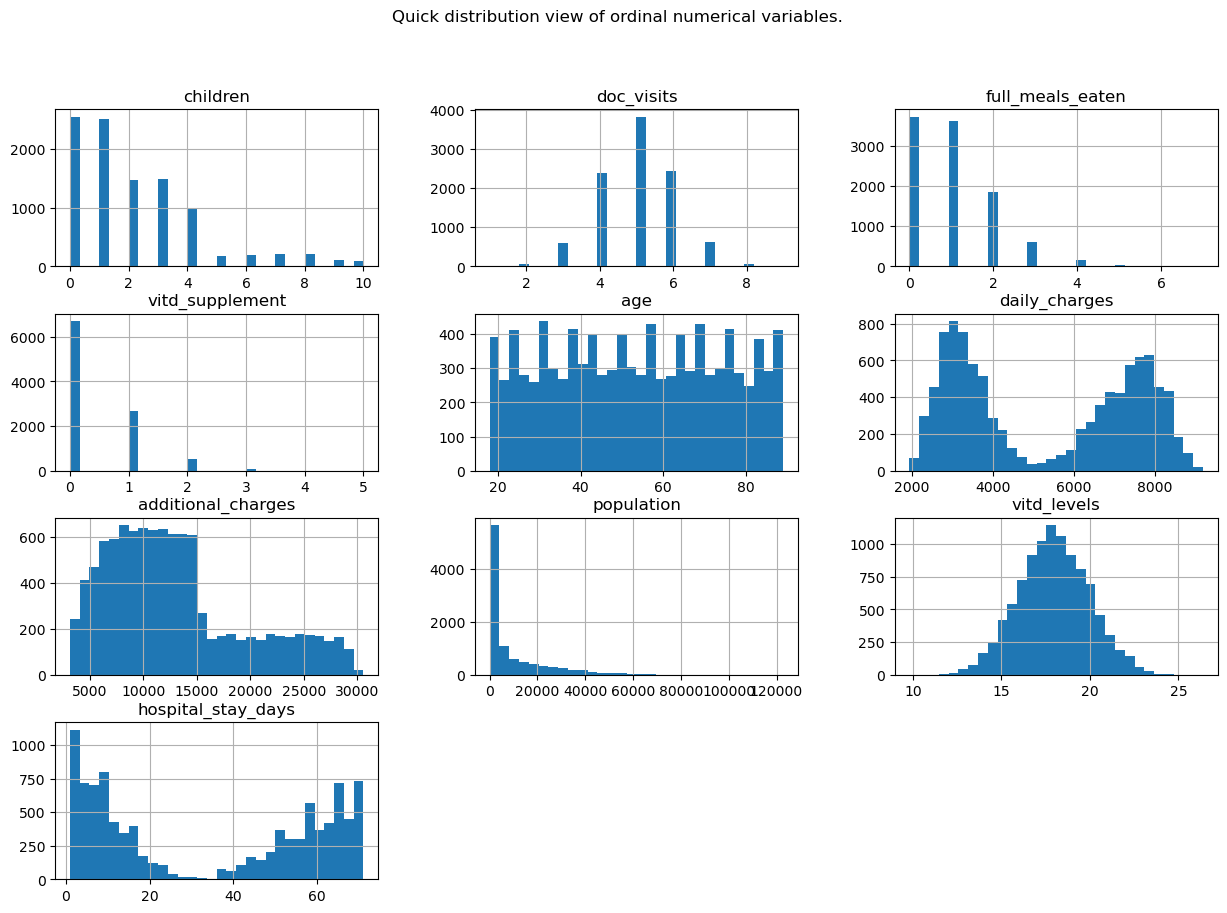

In [4]:
df[num_vars].hist(bins=30, figsize=(15, 10))
plt.suptitle(f'Quick distribution view of ordinal numerical variables.')
plt.show()

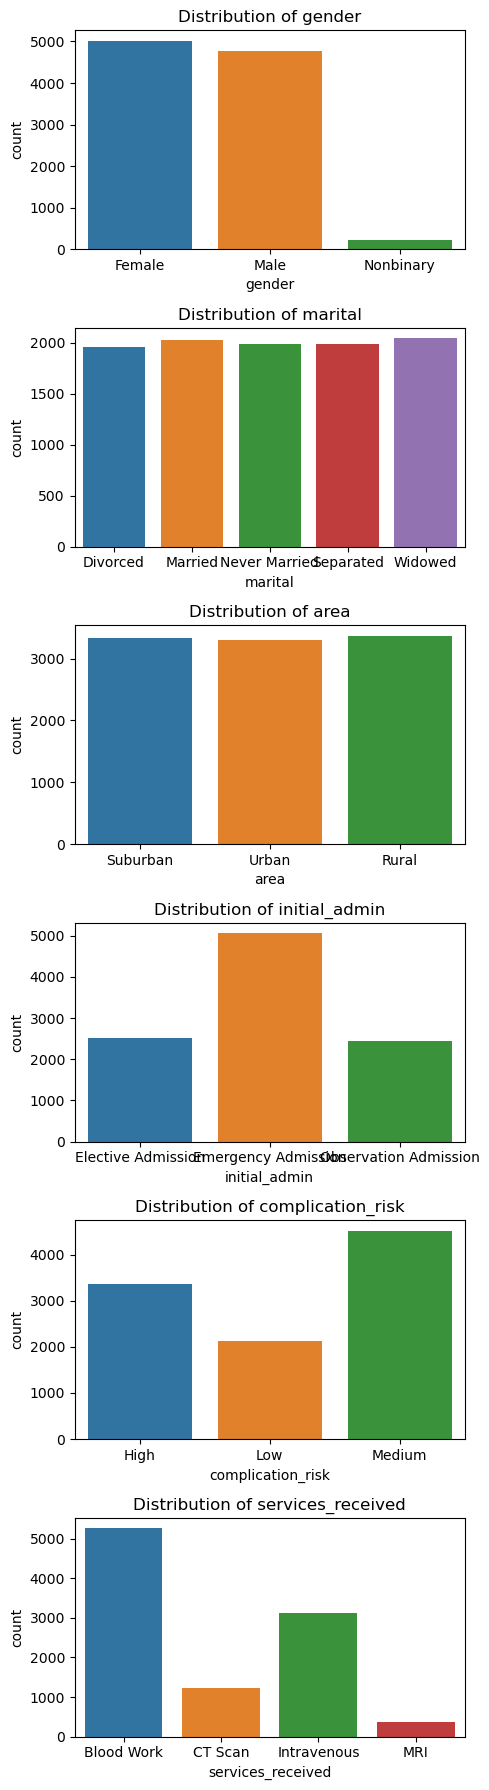

In [5]:
# set up subplots
fig, axes = plt.subplots(nrows=len(cat_vars), figsize=(5, 18))

# Plot each categorical column as a separate subplot
for i, col in enumerate(cat_vars):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

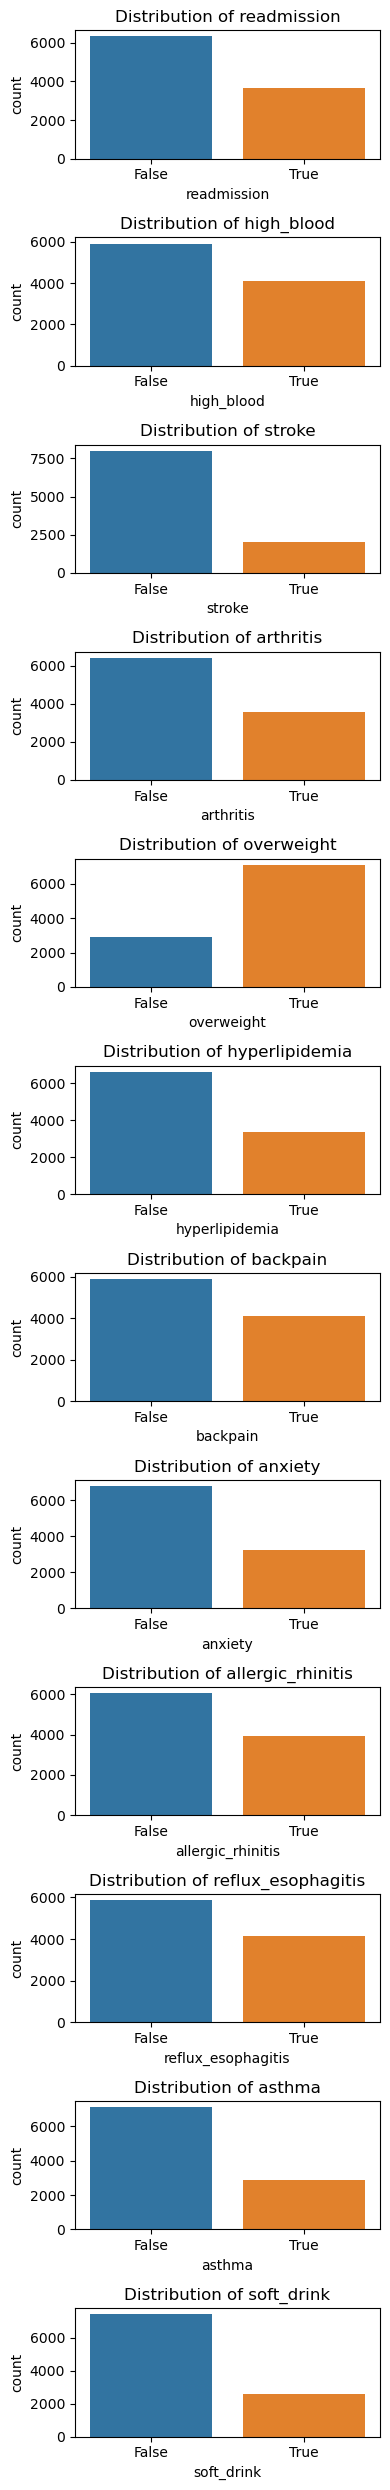

In [6]:
# set up subplots
fig, axes = plt.subplots(nrows=len(bool_vars), figsize=(4, 25))

# Plot each categorical column as a separate subplot
for i, col in enumerate(bool_vars):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Transform Categorical (Dummy Variables)

**Categorical Features**
The columns listed below are nominal categorical variables, meaning they represent categories without any inherent order or ranking. For use in modeling, these categorical variables need to be transformed into numerical representations. However, assigning arbitrary numerical values to each category (e.g. 1 for female and 2 for male) would incorrectly imply a meaningful order and mislead the model. To address this, we use dummy variables, which convert each category into a binary (0 or 1) representation, ensuring that no ordinal relationship is inferred between the categories. This process enables the model to correctly interpret the categorical data without the issue of bias.

According to Geeks for Geeks, "passing-categorical-data-to-sklearn-decision-tree," categorical data plays a crucial role in how decision trees are structured and how well they generalize to new data. Unlike numerical features, which are split based on thresholds, categorical variables require different strategies during the tree-building process to determine the best splits. This impacts the performance and the model’s ability to handle new data.

In [7]:
print(f'Categorical variables to be one hot encoded {cat_vars}')
print('---------')
# Create dummies for the specified columns
dummy_df = pd.get_dummies(df[cat_vars], drop_first=True)

print(f'New dummy columns {list(dummy_df.columns)}')

# concatenate the original dataframe with the dummies
df = pd.concat([df, dummy_df], axis=1)

# # drop the original columns 
df.drop(columns = cat_vars, inplace=True)

df[dummy_df.columns].sample(5)

Categorical variables to be one hot encoded ['gender', 'marital', 'area', 'initial_admin', 'complication_risk', 'services_received']
---------
New dummy columns ['gender_Male', 'gender_Nonbinary', 'marital_Married', 'marital_Never Married', 'marital_Separated', 'marital_Widowed', 'area_Suburban', 'area_Urban', 'initial_admin_Emergency Admission', 'initial_admin_Observation Admission', 'complication_risk_Low', 'complication_risk_Medium', 'services_received_CT Scan', 'services_received_Intravenous', 'services_received_MRI']


,gender_Male,gender_Nonbinary,marital_Married,marital_Never Married,marital_Separated,marital_Widowed,area_Suburban,area_Urban,initial_admin_Emergency Admission,initial_admin_Observation Admission,complication_risk_Low,complication_risk_Medium,services_received_CT Scan,services_received_Intravenous,services_received_MRI
CaseOrder,,,,,,,,,,,,,,,
8675,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0
4269,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
8612,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
8202,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0


### Numerical Variables

For decision tree algorithms, numeric variables do not require special pre-processing like scaling or normalization, which is often necessary for algorithms such as k-NN. Decision trees handle numeric data by splitting it based on thresholds, which the algorithm determines. Tree algorithms are fairly robust to outliers. However, *extreme* outliers can still affect how the tree splits the data.

In [8]:
# get visual, confirm numerical
print('Numerical Variables')
df[num_vars].dtypes
print('----------')
df[num_vars].describe().T

Numerical Variables
----------


,count,mean,std,min,25%,50%,75%,max
children,10000.0,2.097200,2.163659,0.00,0.0000,1.00,3.00,10.00
doc_visits,10000.0,5.012200,1.045734,1.00,4.0000,5.00,6.00,9.00
full_meals_eaten,10000.0,1.001400,1.008117,0.00,0.0000,1.00,2.00,7.00
vitd_supplement,10000.0,0.398900,0.628505,0.00,0.0000,0.00,1.00,5.00
age,10000.0,53.511700,20.638538,18.00,36.0000,53.00,71.00,89.00
daily_charges,10000.0,5312.172758,2180.393815,1938.31,3179.3750,5213.95,7459.70,9180.73
additional_charges,10000.0,12934.528592,6542.601554,3125.70,7986.4850,11573.98,15626.49,30566.07
population,10000.0,9965.253800,14824.758614,0.00,694.7500,2769.00,13945.00,122814.00
vitd_levels,10000.0,17.964272,2.017259,9.81,16.6275,17.95,19.35,26.39
hospital_stay_days,10000.0,33.956000,26.301628,1.00,7.0000,35.50,61.00,71.00


As mentioned above, despite tree algorithms being less sensitive to outliers, it is possible for the feature thresholds to be skewed. An idea to further explore is removing outliers from a data frame copy to explore later.

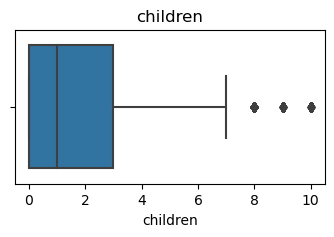

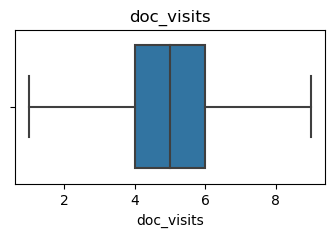

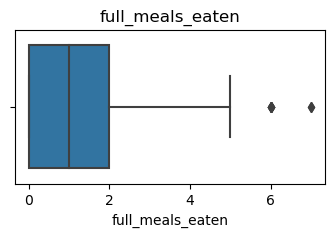

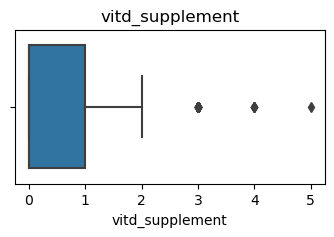

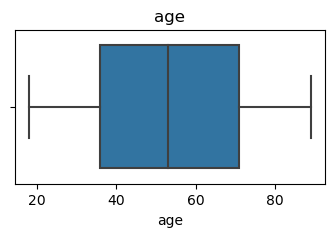

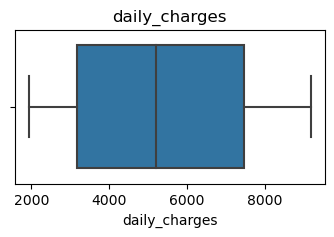

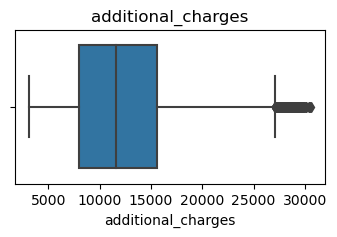

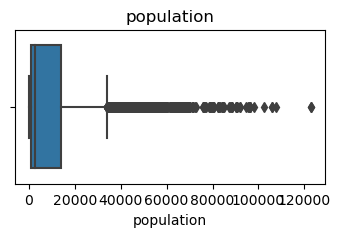

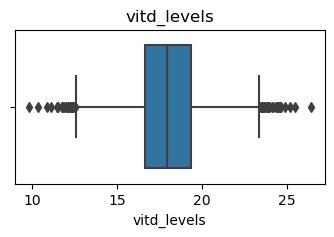

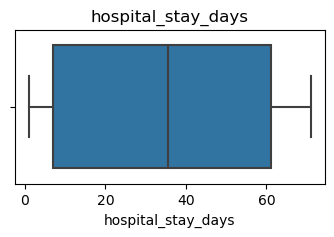

In [9]:
for i in num_vars:
    plt.figure(figsize=(4,2))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

This function removes outliers from the specified columns in the outliers list based on the interquartile range (IQR) method.

In [10]:
def remove_outliers(df, outliers):
    '''
    Removes outliers for a list of columns based on the interquartile range (IQR) method.
    Arguments:
    df: DataFrame to clean.
    outliers: List of columns to remove outliers from.
    
    Returns:
    DataFrame with outliers removed.
    '''
    
    
    df_no_outliers = df.copy()  # Create a copy of the original dataframe
    
    for col in outliers:
        # Calculate Q1, Q3, and IQR
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the dataframe by removing rows with outliers
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    
    return df_no_outliers

In [11]:
outliers = ['children',
            'full_meals_eaten',
            'vitd_supplement',
            'additional_charges',
            'population',
            'vitd_levels']


df_no_outliers = remove_outliers(df, outliers)

In [12]:
## C4.  Copy of CSV
# df.to_csv('cleaned_tree_df.csv')
# df = pd.read_csv('cleaned_tree_df.csv')

# Part IV: Modeling Analysis

## D1.  Splitting Data

Splitting data for modeling is essential to ensure an algorithms ability to generalize an algorithm on training data and test true accuracy on unseen data. By dividing the dataset into training, validation and test sets, the model is trained on one portion (the training set) and then evaluated on another portion (the validation set) that it has not seen before.

In data science practice, the test set is always saved for last and shall only be tested once and only once. This allows for an unbiased assessment of the model's true performance and helps to prevent overfitting, where the model performs well on training data but poorly on new unseen data.

For the sake of this project and the educational setting, I will only split into train and validate, using validate as my only test set.

In [13]:
# split data into train, validate and test sets
train, validate = train_test_split(df,
                                    test_size=.2, 
                                    random_state=314,
                                    shuffle=True)


train.to_csv('tree_train_df.csv')
validate.to_csv('tree_validate_df.csv')

print(f'Train shape ---> {train.shape}')
print(f'Validate shape ---> {validate.shape}')

Train shape ---> (8000, 38)
Validate shape ---> (2000, 38)


In [14]:
## separate y target
trainY = train['diabetes']
valY = validate['diabetes']

trainX = train.drop(columns=['diabetes'])
valX = validate.drop(columns=['diabetes'])

In [15]:
# verify columns are same count
(trainX.columns == valX.columns).all()

True

## D2/D3.  Analysis Technique & Python Code

My initial analysis will involve applying the Decision Tree Classifier using all features. Since this is a classification analysis, I will evaluate the model by reviewing the confusion matrix and focusing on key metrics like F1 score, recall, and precision.

In this scenario for predicting diabetes, my primary focus will be on recall, which increases as the count of false negatives decreases. False negatives are cases where the model predicts a patient does not have diabetes when in fact they do. Reducing false negatives is crucial for improving recall, as missing a diagnosis could have serious health implications.

Although recall is the top priority, precision should also be monitored to avoid predicting diabetes in patients who do not have it, and possibly wasting unnecessary tests and exams. F1 score will provide a balanced view of both metrics, ensuring that improving recall does not come at the cost of a significant drop in precision. This balanced approach will allow for better overall performance in a sensitive task like medical diagnosis.

From a technical standpoint, I will use the DecisionTreeClassifier() function from sklearn and train it on the train data frame,  using the all features. After training the model, I will generate predictions for both the training and validation sets and store these predictions for further analysis. By comparing the predictions for both datasets, I will assess how well the model generalizes to unseen data.

To evaluate the performance of the model, I will apply scoring functions such as f1_score() to the predictions for both training and validation sets. This ensures there is no major performance gap between the two, which would indicate the model is overfitting. Consistent performance between training and validation data suggests that the model is generalizing well to new unseen data.

To better understand where my model is performing well and where it may struggle, I will visualize the confusion matrix using a heatmap. This allows for clearer identification of false positives and false negatives. This visual representation highlights the model’s strengths, such as correctly identifying diabetic patients, as well as its weaknesses, like missing positive cases or generating false positives. Using the confusion matrix heatmap helps to further identify model behavior and guide improvements for future iterations.

Depending on results, I would like to explore feature importance functions and various trials with the data frame with outliers removed.

### Modeling

In [41]:
def decisiontree_model_training(dt_algo, trainX, trainY, valX, valY, columns=None):
    '''
    This function takes in the split data sets and the specific
    algorithm, trains a model, prints out the metrics scores as well
    as the confusion matrix.

    Arguments:
    dt_algo: algorithm
    trainX: Training features
    trainY: Training labels
    valX: Validation features
    valY: Validation labels
    columns: Subset of columns from trainX to use, optional
    '''
    
    # Ensure column filtering works correctly
    if columns is not None:
        trainX = trainX[columns]
        valX = valX[columns]
        print(f'Using reduced column set: {columns}')
      
    # make variable obtainable
    global valY_pred
        
    print(f'Algorithm {dt_algo.__class__.__name__}')
    
    # Train the model
    dt_algo.fit(trainX, trainY)

    # Predictions
    trainY_pred = dt_algo.predict(trainX)
    valY_pred = dt_algo.predict(valX)

    # Print classification report for validation set
    print("-------------")
    # print('Classification report for Validation')
    # print(classification_report(valY, valY_pred))
    print("-------------")
    
        # Calculate and print confusion matrix details
    tn, fp, fn, tp = confusion_matrix(trainY, trainY_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)

    print(f"Train Accuracy is {accuracy:.3f}")
    print(f"Train Recall is {recall:.3f}")
    print(f"Train Precision is {precision:.3f}")
    print("-------------")

    # Calculate and print confusion matrix details
    tn, fp, fn, tp = confusion_matrix(valY, valY_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)

    print(f"Val Accuracy is {accuracy:.3f}")
    print(f"Val Recall is {recall:.3f}")
    print(f"Val Precision is {precision:.3f}")
    print("-------------")

    # Print F1 scores for train and validation sets
    print(f'F-1 Score of {dt_algo.__class__.__name__} classifier on train set: {f1_score(trainY, trainY_pred, average="weighted"):.3f}')
    print(f'F-1 Score of {dt_algo.__class__.__name__} classifier on validate set: {f1_score(valY, valY_pred, average="weighted"):.3f}')
    print('--------------')

    print('Validation Confusion Matrix')
    # Confusion matrix and heatmap
    val_cm = confusion_matrix(valY, valY_pred)
    labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    labels = np.asarray(labels).reshape(2, 2)
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    sns.heatmap(val_cm / np.sum(val_cm), annot=True, fmt='.0%', cmap=cmap,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], linewidth=.5)
    plt.xlabel('Predicted Diabetes')
    plt.ylabel('Actual Diabetes')
    plt.show()

Algorithm DecisionTreeClassifier
-------------
-------------
Train Accuracy is 1.000
Train Recall is 1.000
Train Precision is 1.000
-------------
Val Accuracy is 0.601
Val Recall is 0.251
Val Precision is 0.278
-------------
F-1 Score of DecisionTreeClassifier classifier on train set: 1.000
F-1 Score of DecisionTreeClassifier classifier on validate set: 0.594
--------------
Validation Confusion Matrix


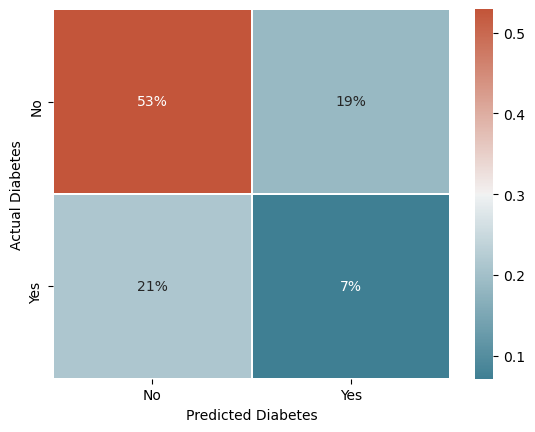

In [23]:
dt_algo = DecisionTreeClassifier(class_weight='balanced', random_state=314)
decisiontree_model_training(dt_algo, trainX, trainY, valX, valY)

Decision Trees are prone to over-fitting, as seen above with validation metrics producing a score of 100%. Because of this, it is necessary to employ a gridsearch technique.
The `GridSearchCV` function essentially finds the best settings for a Decision Tree model by testing different combinations of hyperparameters, like how deep the tree should grow or how many samples are needed to split a node. It tries each combination and analyzes what variation of parameters works best using cross-validation, where the data is split into multiple parts to test how well the model works on unseen data. By using cross-validation, the gridsearch function is able to test all the hyper parameters on all the folds and essentially track when scores drop, thus helping it pinpoint which hyperparamters were responsible.

This process prevents overfitting by finding the right balance of hyper parameters. From there, the best metrics are provided for further fine tuning if desired.

#### Grid Search

In [24]:
# adding if statement for when jupyter re-runs, to save time
if False:
    # shuffle data, high splits for better accuracy and aid in preventing overfitting
    skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=314)

    # initialize model
    dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=314)

    # define the hyperparameters and range of values to explore/search
    param_grid = {
        'max_depth': [1, 3, 5, 7],  
        'min_samples_split': [2, 3, 5, 10, 12,20],  
        'min_samples_leaf': [1, 2, 4, 10]
    }

    # initialize GridSearchCV, specify 5-fold cross-validation
    grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=skf, scoring='f1')

    # fit the grid search on training data
    grid_search.fit(trainX, trainY)

    # best hyperparameters and score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", grid_search.best_score_)

    # use the best model to make predictions on the validation set
    best_model = grid_search.best_estimator_
    valY_pred = best_model.predict(valX)
    # savechampion model metrics
    champ_model_params = grid_search.best_params_

    # Check recall on validation set
    print("Validation F1:", f1_score(valY, valY_pred))

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best Cross-Validation Score: 0.42238509390203005
Validation F1: 0.4333619948409286


#### Try Without Outliers

In [26]:
# split data into train, validate and test sets
train2, validate2 = train_test_split(df_no_outliers,
                                    test_size=.2, 
                                    random_state=314,
                                    shuffle=True)

print(f'Train shape ---> {train2.shape}')
print(f'Validate shape ---> {validate2.shape}')

## separate y target
trainY2 = train2['diabetes']
valY2 = validate2['diabetes']

trainX2 = train2.drop(columns=['diabetes'])
valX2 = validate2.drop(columns=['diabetes'])

Train shape ---> (6635, 38)
Validate shape ---> (1659, 38)


In [30]:
# adding if statement for when jupyter re-runs, to save time
if False:
    # shuffle data, high splits for better accuracy and aid in preventing overfitting
    skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=314)

    # initialize model
    dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=314)

    # define the hyperparameters and range of values to explore/search
    param_grid = {
        'max_depth': [1, 3, 5, 7],  
        'min_samples_split': [2, 3, 5, 10, 12,20],  
        'min_samples_leaf': [1, 2, 4, 10]
    }

    # initialize GridSearchCV, specify 5-fold cross-validation
    grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=skf, scoring='f1')

    # fit the grid search on training data
    grid_search.fit(trainX2, trainY2)

    # best hyperparameters and score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", grid_search.best_score_)

    # use the best model to make predictions on the validation set
    best_model = grid_search.best_estimator_
    valY_pred = best_model.predict(valX2)

    # Check recall on validation set
    print("Validation F1:", f1_score(valY2, valY_pred))

Best Parameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.423291032534045
Validation F1: 0.4256651017214398


The results from testing the dataframe without outliers showed promising scores. However, there was still a slight drop in the F1 score. It doesn't appear that removing outliers helps, however this could be worth further exploring in the future. To maintain consistency and reliability, I will proceed with the original champion model for now.

### Champion Model with Best Parameters

Algorithm DecisionTreeClassifier
-------------
-------------
Train Accuracy is 0.332
Train Recall is 0.919
Train Precision is 0.278
-------------
Val Accuracy is 0.341
Val Recall is 0.884
Val Precision is 0.287
-------------
F-1 Score of DecisionTreeClassifier classifier on train set: 0.261
F-1 Score of DecisionTreeClassifier classifier on validate set: 0.276
--------------
Validation Confusion Matrix


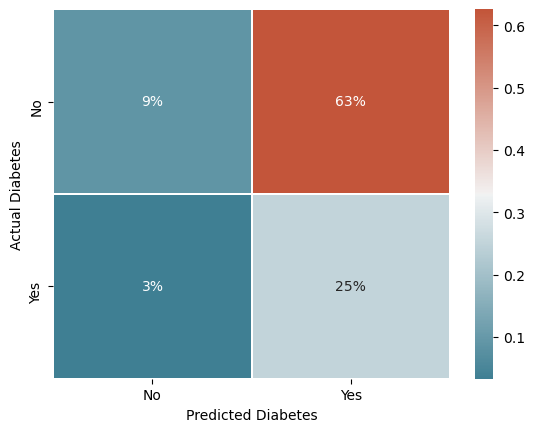

In [42]:
dt = DecisionTreeClassifier(**champ_model_params, class_weight='balanced', random_state=314)
decisiontree_model_training(dt, trainX, trainY, valX, valY)

***Mean Squared Error***

In [51]:
# change to float due to function deprecation
valY3 = valY.astype(np.float32).copy()
valY_pred3 = valY_pred.astype(np.float32).copy()

dt = DecisionTreeClassifier(**champ_model_params, class_weight='balanced', random_state=314)

# mean squared error
mse = mean_squared_error(valY3, valY_pred3)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.6590


# Part V: Data Summary & Implications

## E1.  Accuracy and Mean Squared Error (MSE) of Champion Model.

I am not a fan personally of using *accuracy* per se as a metric. Accuracy can be very misleading in the way it is calculated. Instead, I often prefer a pair of metrics to monitor concurrently such as F1 and Recall, since they offer greater insight into the performance of true positive and true negative rates. However, this is different for every data set and model combination. For the champion model, I landed at a recall score of 0.88 for the validation set and 0.28 for F1 score. This is a great starting point for a minimum viable product model and is worth fine tuning further on next steps.

The Mean Squared Error (MSE) of 0.66 for predicting the diabetes shows that the algorithm's predictions deviate from the actual labels by an average 66%. A higher MSE in a binary classification task like this reveals that the model is misclassifying a significant portion of the validation data. This result highlights the need for further model tuning or the consideration of alternative methods to improve model performance.

## E2. Results & Summary of Analysis

When initially running the Decision Tree model to predict diabetes, it became clear that without basic tuning, the algorithm was prone to overfitting. To avoid this, I implemented the `class_weight='balanced'` option to account for class imbalance, ensuring that both positive (diabetes) and negative cases were weighted appropriately. This combined with running a GridSearchCV for hyperparameter optimization resulted in significant improvements and successfully eliminated the overfitting issue.

Further analysis involved testing the model on a dataset with outliers removed. However, this adjustment did not yield significant performance gains, suggesting that outliers were not a major source of error in this case. Ultimately, the best-performing model was selected using the parameters optimized by GridSearchCV, producing the following results:

- **Train Accuracy**: 33.2% 
- **Train Recall**: 91.9%
- **Train Precision**: 27.8%
- **Validation Accuracy**: 34.1%
- **Validation Recall**: 88.4%
- **Validation Precision**: 28.7%
- **Train F-1 Score**: 0.261
- **Validation F-1 Score**: 0.276

These results show that while the model achieves a high recall on both the training and validation sets, 91.9% and 88.4% respectively, precision remains low. The model is correctly identifying most diabetes cases but at the cost of many false positives, leading to lower precision. The F1 score shows a trade off, balancing the high recall and low precision.

In terms of predicting diabetes, this model demonstrates an ability to detect the condition, but further tuning or alternative models are necessary to reduce the number of false positives and improve overall metrics. It is important to continue refining the model to ensure that the predictions are reliable and practical in a real world medical context.

## E3. Limitations of Analysis.

The analysis conducted using the Decision Tree algorithm to predict diabetes faced several limitations. First, despite improvements in handling class imbalance through class_weight='balanced', the model's precision remained low, showing that false positives were a common issue. This may negatively affect the model's real-world applicability. The cost of misdiagnosing non diabetic patients as diabetic can be high.

Another limitation is the imbalance in the dataset, where non diabetes cases outnumber diabetes cases. It is a positive that the model showed high recall, however, it could be overcompensating by predicting too many positive cases (i.e. predicting diabetes too frequently).

Lastly, the dataset's features, such as medical variables and lifestyle factors, may not be exhaustive enough to fully predict diabetes accurately. The limited feature set could prevent the model from capturing more subtle interactions that are important for diagnosis. This shows a necessity for more comprehensive data collection.

## E4.  Recommended Course of Action

Based on the results of this project, several steps should be considered to improve the predictive performance and practical utility of the model. First, expanding the feature set is recommended. Incorporating additional medical factors, such as detailed family history, specific blood test results, and more granular lifestyle data, could help improve the model’s ability to differentiate between diabetic and non diabetic patients.

Exploring more advanced models such as Random Forests and Gradient Boosting, might be beneficial. These ensemble methods typically perform better than single decision trees and could help improve both precision and overall accuracy. Additionally, further exploration of feature engineering, such as could also improve the model.

It would also be beneficial to focus on improving the precision of the model. Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or other resampling methods could be explored to better handle any class imbalances.

In summary, while the current model shows promise in detecting diabetes, further steps including model refinement, feature expansion, and more advanced data handling techniques, are essential to ensure its effectiveness in real world applications.

# Sources

[Geeks for Geeks - Passing Categorical Data for Decision Tree](https://www.geeksforgeeks.org/passing-categorical-data-to-sklearn-decision-tree/)

[Codecadamy - Decision Tree](https://www.codecademy.com/article/mlfun-decision-trees-article)

[IBM - Decision Trees](https://www.ibm.com/topics/decision-trees)

[Lucid Chart Visual](https://lucid.app/lucidspark/8a5db586-e880-479c-802c-11e1cac09e5f/edit?viewport_loc=1770%2C600%2C1056%2C832%2C0_0&invitationId=inv_36984e62-ae08-4278-b42c-b5cc9536ff1d)

[Sklearn - Decision Tree Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

[MachineLearningModels - ML Models that Require Feature Scaling](https://machinelearningmodels.org/machine-learning-models-that-require-feature-scaling/)

[Sklearn - GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html)

[Analytics Vidhya - Overcoming class imbalance using SMOTE technique.](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#:~:text=By%20mitigating%20bias%20and%20capturing,predictions%20and%20better%20model%20performance.)